<a href="https://colab.research.google.com/github/liannamarraffino/Abalone-Classification/blob/main/Abalone_Sex_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.8 MB/s

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret
import plotly.express as px
from pycaret.classification import *

In [ ]:
! pip install -q kaggle

In [ ]:
! pip install ucimlrepo

In [8]:
!wget -q http://archive.ics.uci.edu/static/public/1/abalone.zip
!unzip -q abalone.zip

# Data Analysis and Preparation

In [16]:
df = pd.read_csv('abalone.data')
print(df.head())

   M  0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   8


In [ ]:
print(df)

      M  0.455  0.365  0.095   0.514  0.2245   0.101    0.15  15
0     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
1     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
2     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
3     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
4     I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4171  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4172  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4173  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4174  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4175  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4176 rows x 9 columns]


In [17]:
column_names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df.columns = column_names
print(df.head())

  sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   

   shell_weight  rings  
0         0.070      7  
1         0.210      9  
2         0.155     10  
3         0.055      7  
4         0.120      8  


In [11]:
df.describe()

length     diameter       height  whole_weight  shucked_weight  \
count  4176.000000  4176.000000  4176.000000   4176.000000      4176.00000   
mean      0.524009     0.407892     0.139527      0.828818         0.35940   
std       0.120103     0.099250     0.041826      0.490424         0.22198   
min       0.075000     0.055000     0.000000      0.002000         0.00100   
25%       0.450000     0.350000     0.115000      0.441500         0.18600   
50%       0.545000     0.425000     0.140000      0.799750         0.33600   
75%       0.615000     0.480000     0.165000      1.153250         0.50200   
max       0.815000     0.650000     1.130000      2.825500         1.48800   

       viscera_weight  shell_weight        rings  
count     4176.000000   4176.000000  4176.000000  
mean         0.180613      0.238852     9.932471  
std          0.109620      0.139213     3.223601  
min          0.000500      0.001500     1.000000  
25%          0.093375      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

df.describe() shows that the height column has values that are equal to zero. These values need to be removed.

In [18]:
df[df['height']==0]

sex  length  diameter  height  whole_weight  shucked_weight  \
1256   I   0.430      0.34     0.0         0.428          0.2065   
3995   I   0.315      0.23     0.0         0.134          0.0575   

      viscera_weight  shell_weight  rings  
1256          0.0860        0.1150      8  
3995          0.0285        0.3505      6

In [19]:
df.drop(index=[1256,3995], inplace = True)
df.shape

(4174, 9)

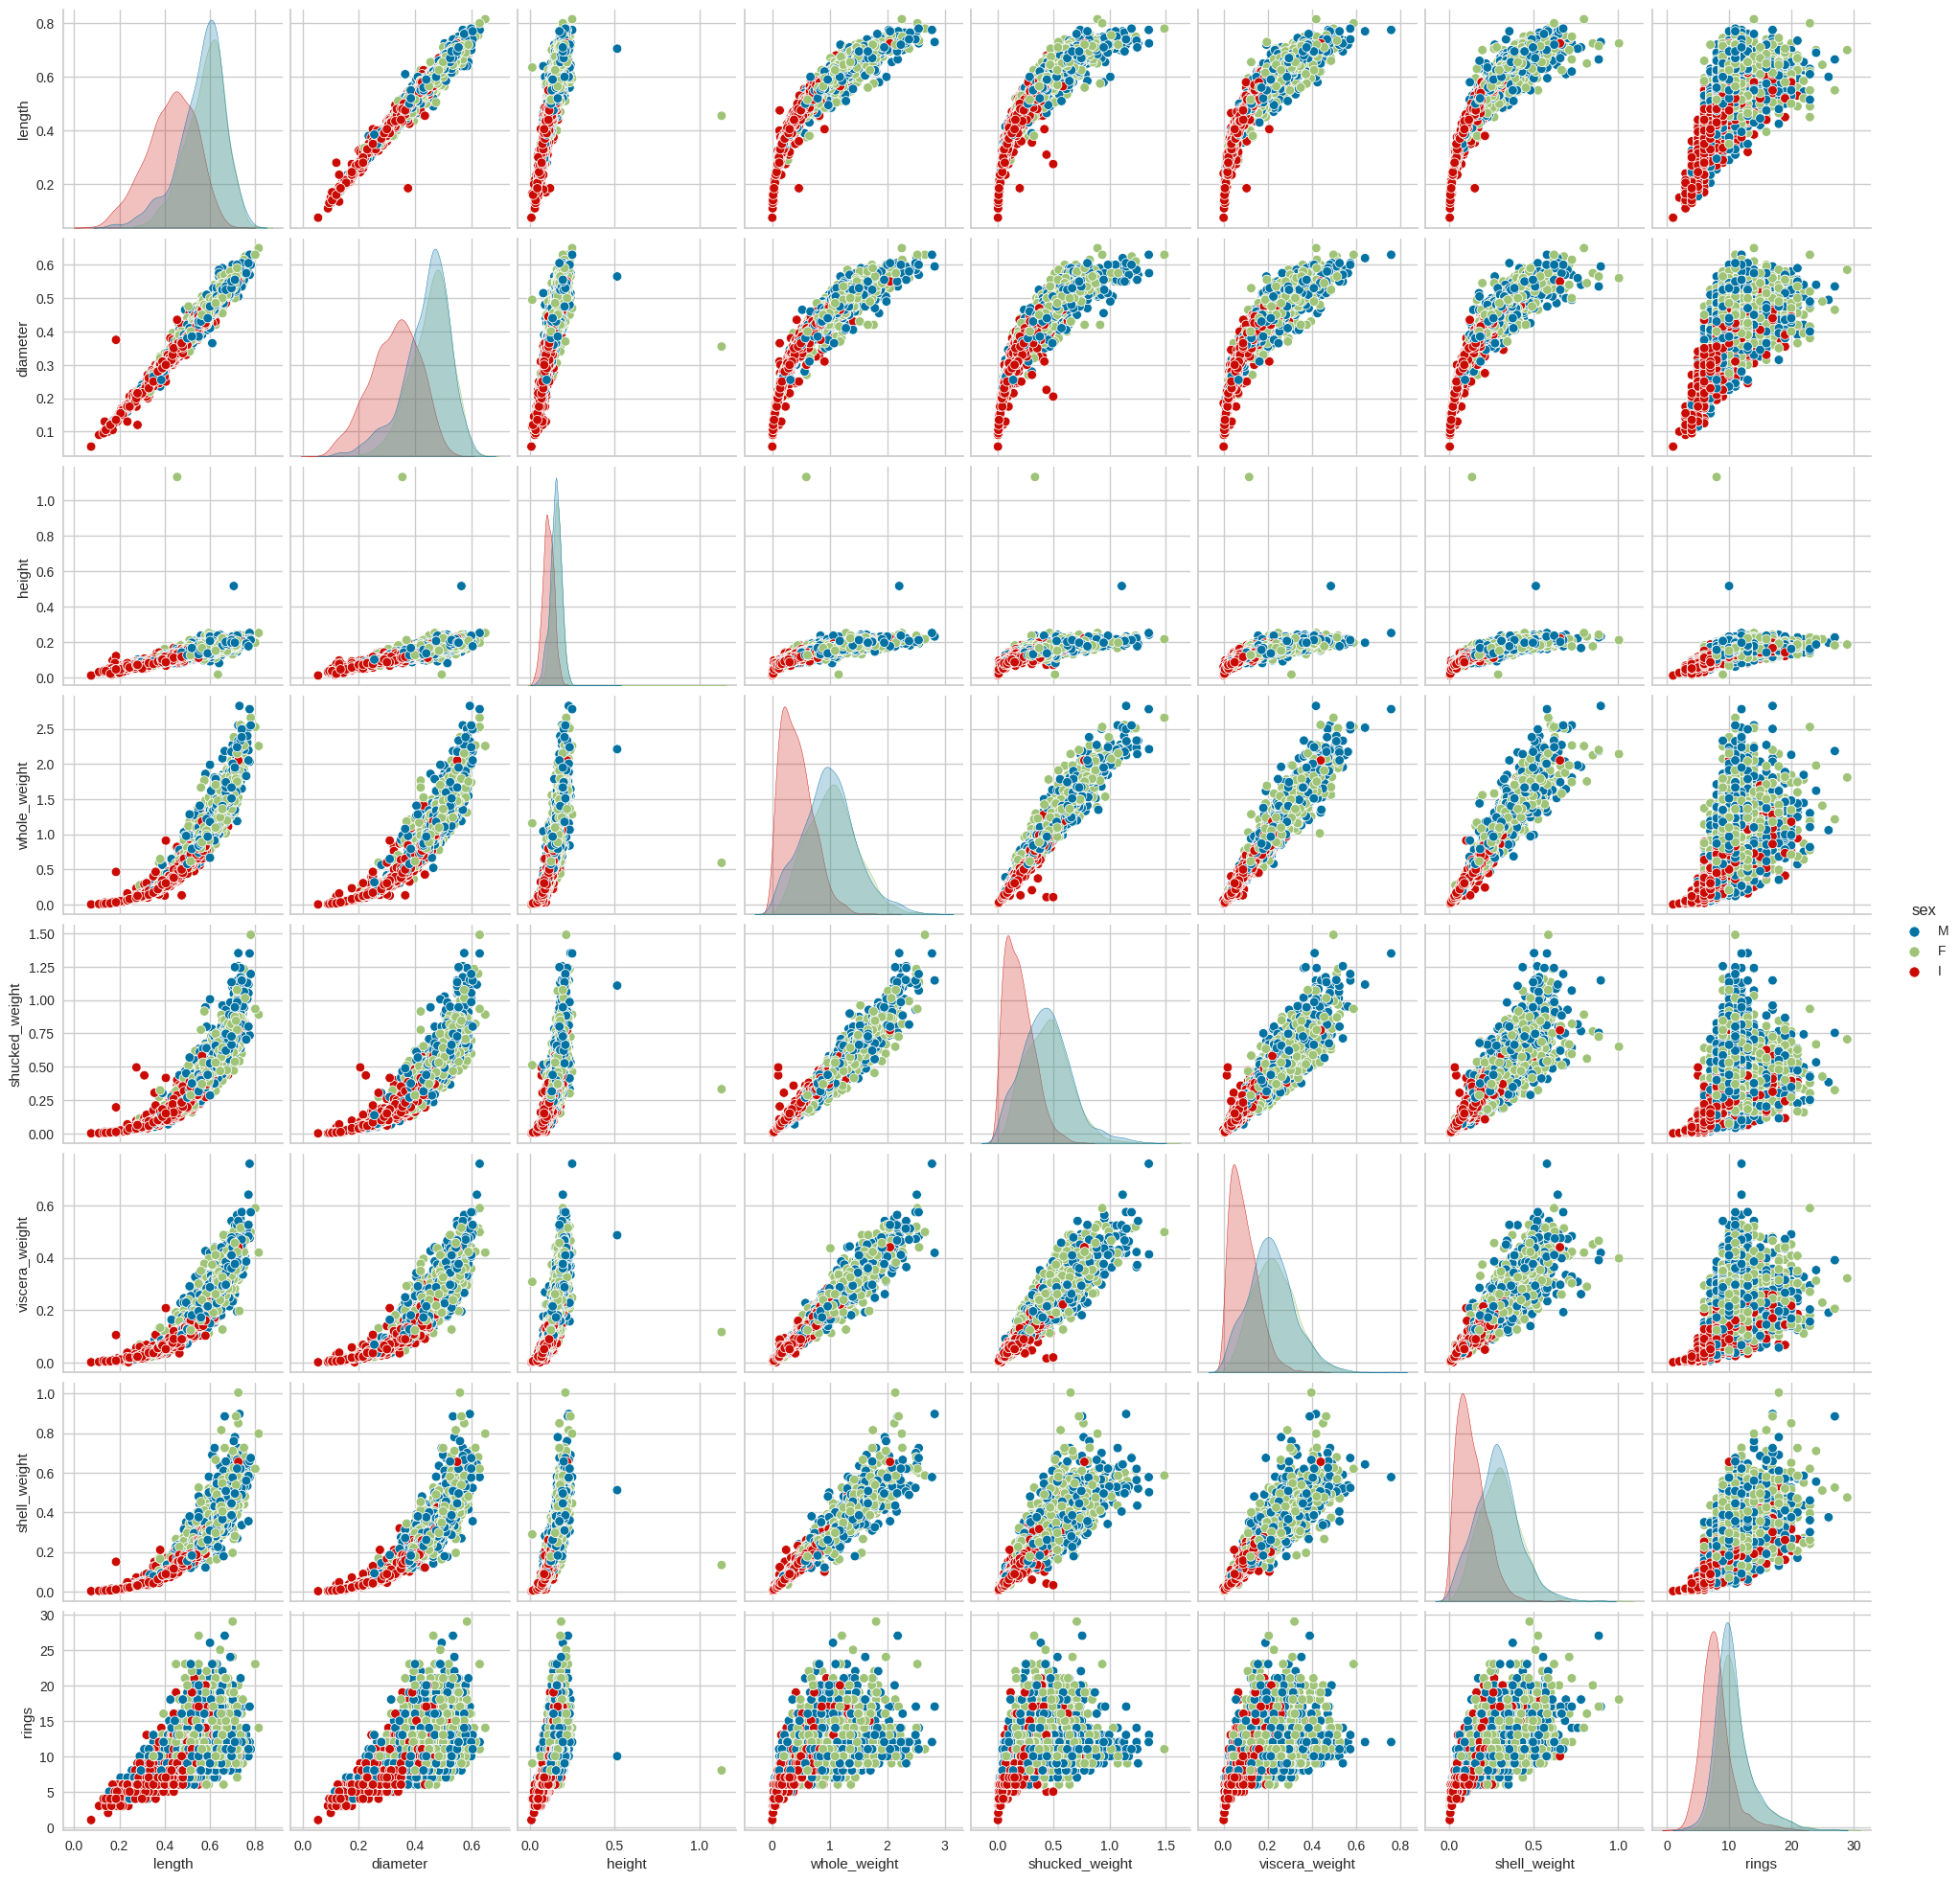

In [ ]:
sns.pairplot(df, hue = 'sex')

There is large overlap in the density plots for classes male and female. The class Infant can be seen to be differentiated from the other two classes. These initial plots are showing it might be difficult to distinguish between male and female abalone.

<AxesSubplot: >

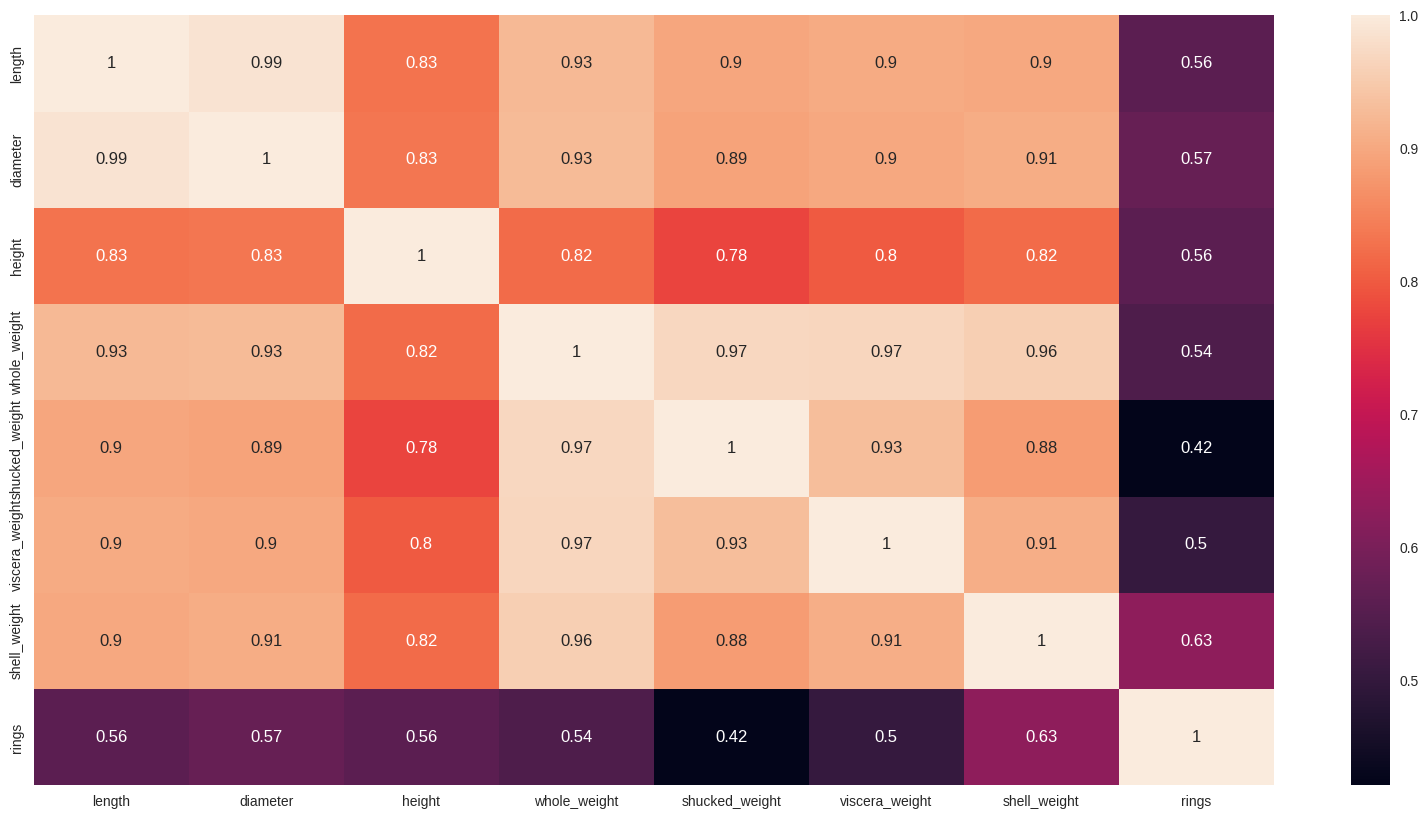

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

Since there is three classes for this dataset (male M, female F, and infant I) but the goal is jus to classify the sex of the abalone, the 'infant' class is going to removed to make this a binary classification problem.

In [ ]:
value_to_drop = 'I'
rows_to_drop = df['sex'] == value_to_drop
df_MF = df[~rows_to_drop]

print(df_MF)

     sex  length  diameter  height  whole_weight  shucked_weight  \
0      M   0.350     0.265   0.090        0.2255          0.0995   
1      F   0.530     0.420   0.135        0.6770          0.2565   
2      M   0.440     0.365   0.125        0.5160          0.2155   
5      F   0.530     0.415   0.150        0.7775          0.2370   
6      F   0.545     0.425   0.125        0.7680          0.2940   
...   ..     ...       ...     ...           ...             ...   
4171   F   0.565     0.450   0.165        0.8870          0.3700   
4172   M   0.590     0.440   0.135        0.9660          0.4390   
4173   M   0.600     0.475   0.205        1.1760          0.5255   
4174   F   0.625     0.485   0.150        1.0945          0.5310   
4175   M   0.710     0.555   0.195        1.9485          0.9455   

      viscera_weight  shell_weight  rings  
0             0.0485        0.0700      7  
1             0.1415        0.2100      9  
2             0.1140        0.1550     10  
5      

Now we can see that the columns that were classified as 'I' have been removed. There is now 2834 rows.

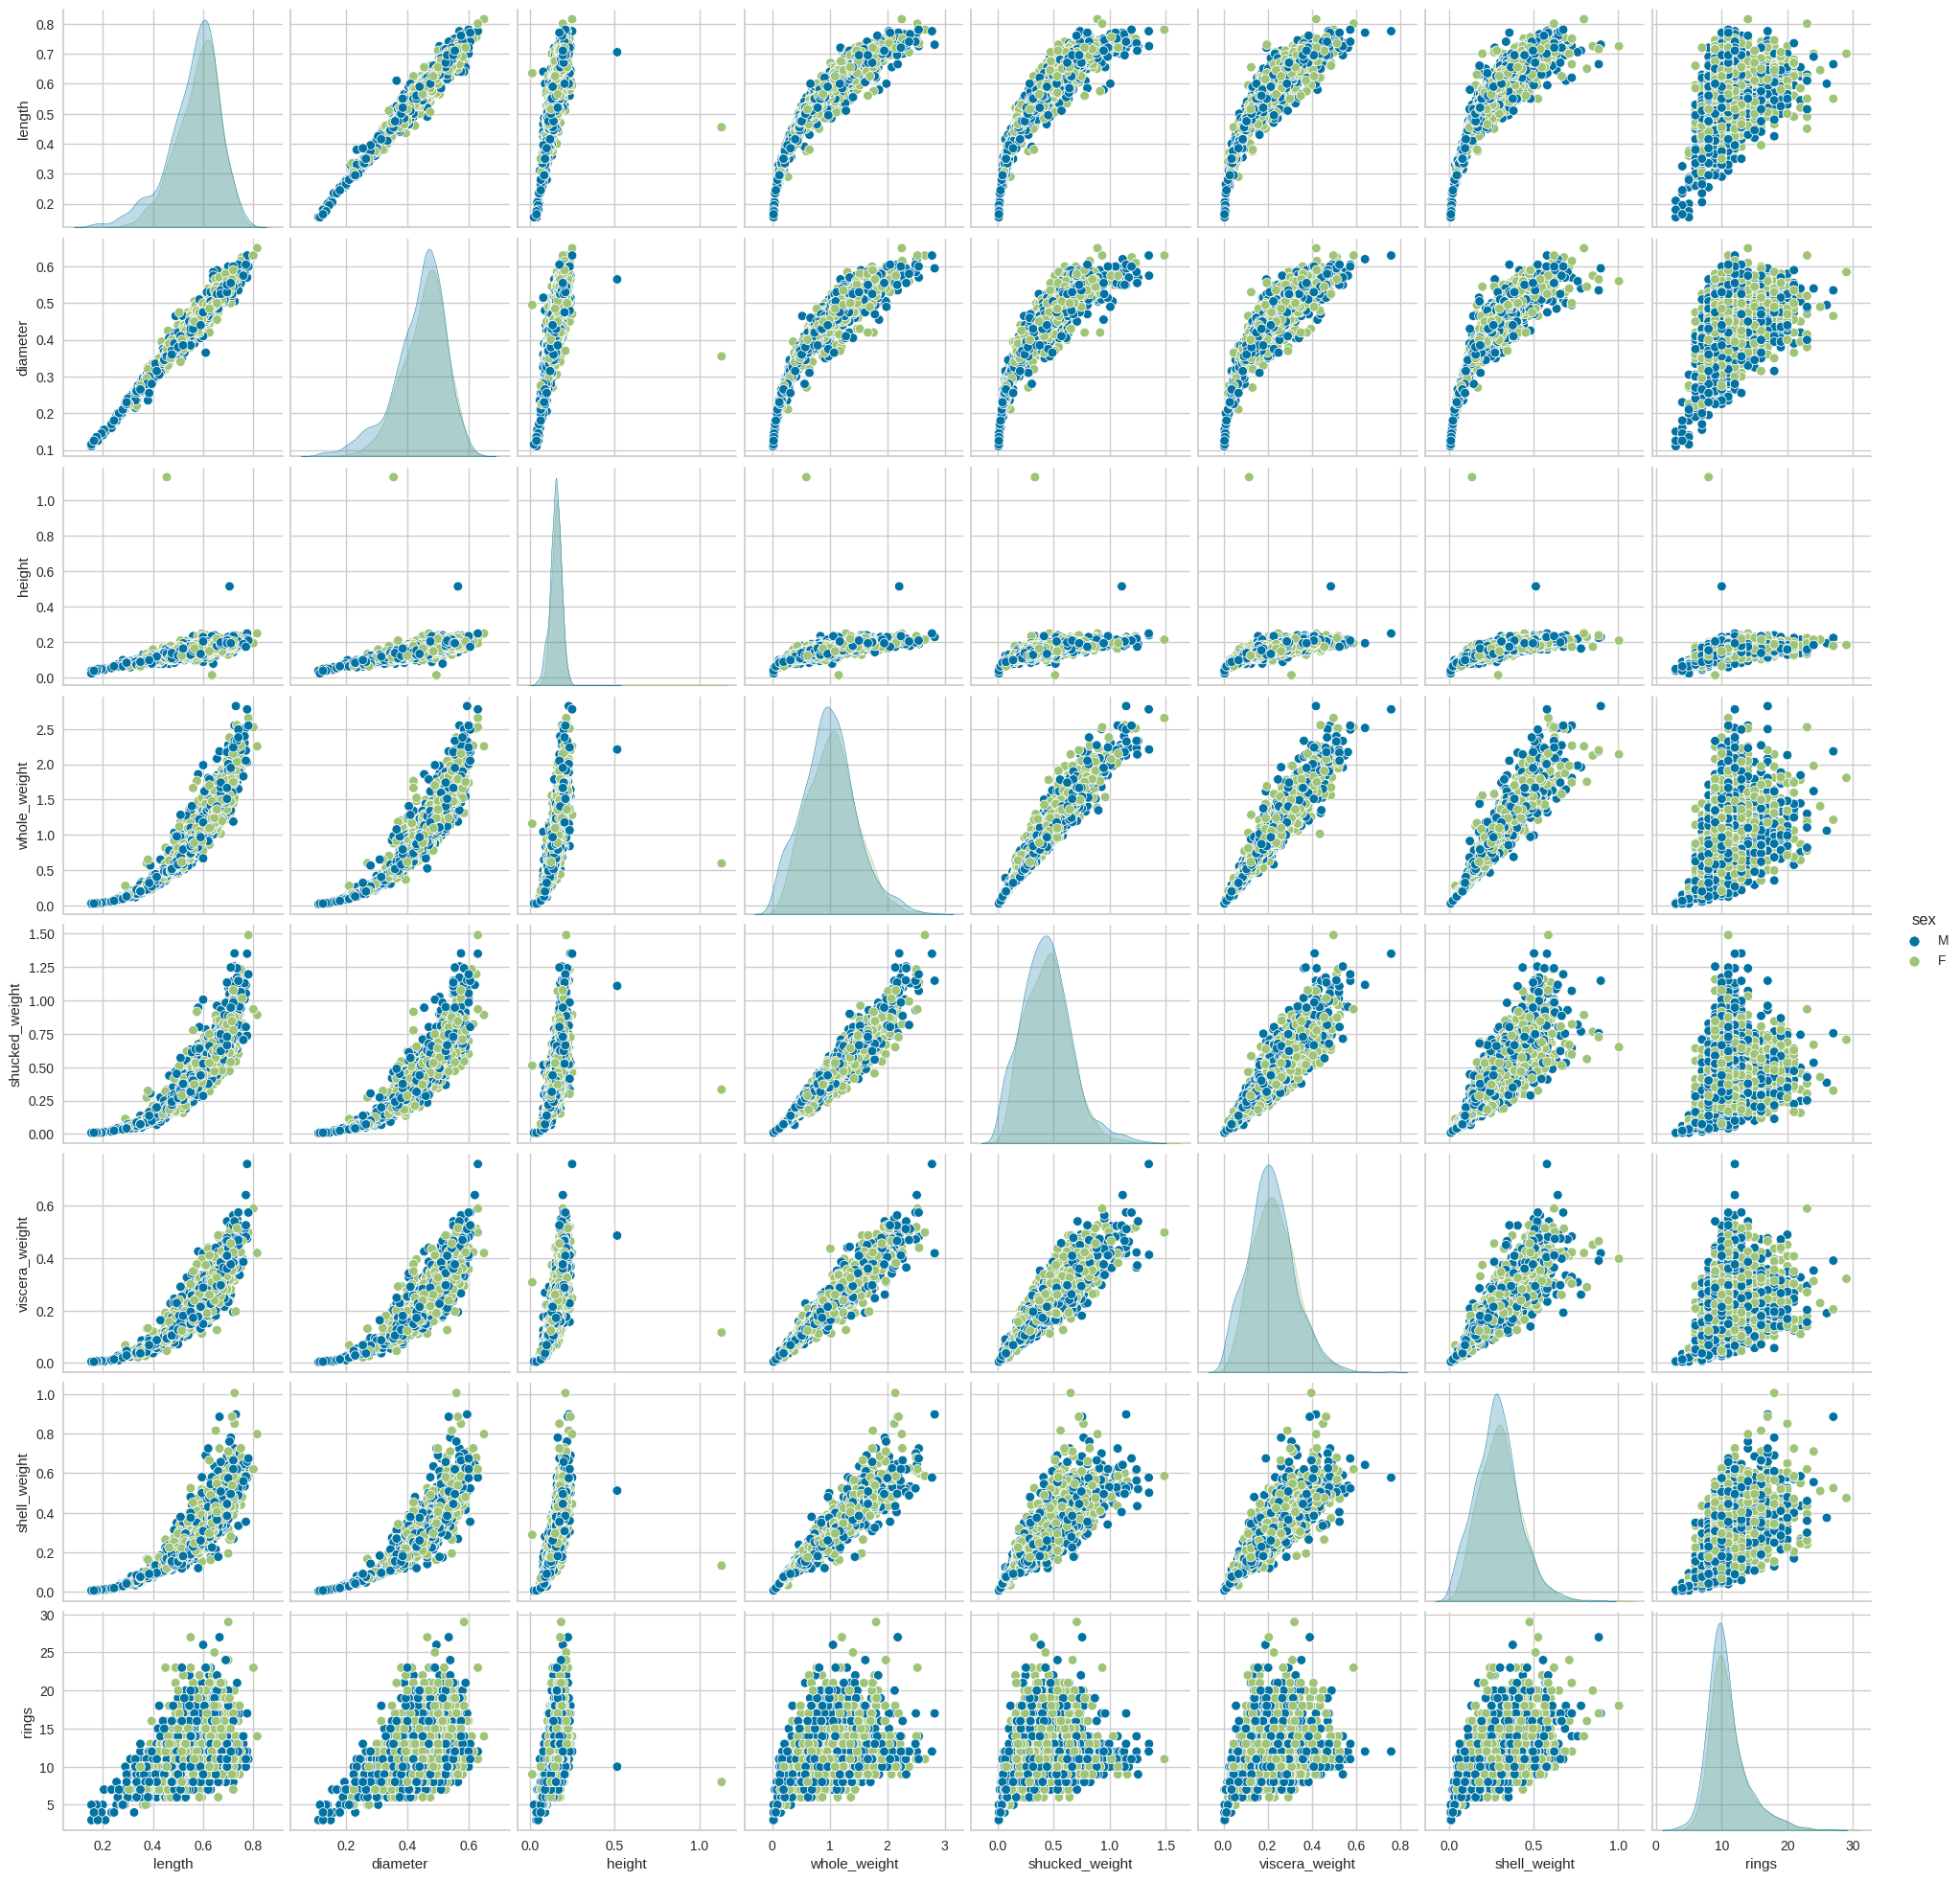

In [ ]:
sns.pairplot(df_MF, hue = 'sex')

In [ ]:
df_length=df_MF[['sex', 'length']]
df_diameter=df_MF[['sex', 'diameter']]
df_height=df_MF[['sex', 'height']]
df_whole_weight=df_MF[['sex', 'whole_weight']]
df_shucked_weight=df_MF[['sex', 'shucked_weight']]
df_visceraweight=df_MF[['sex', 'viscera_weight']]
df_shellweight=df_MF[['sex', 'shell_weight']]
df_rings=df_MF[['sex', 'rings']]

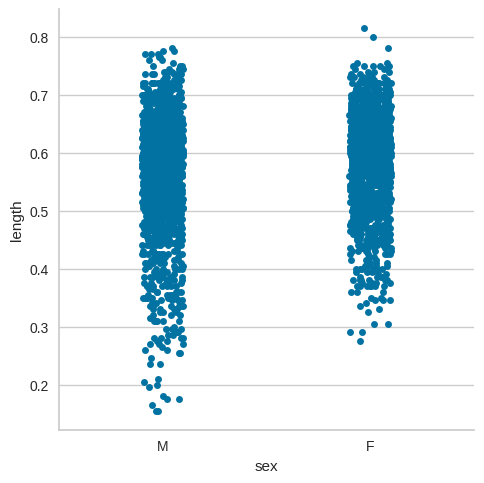

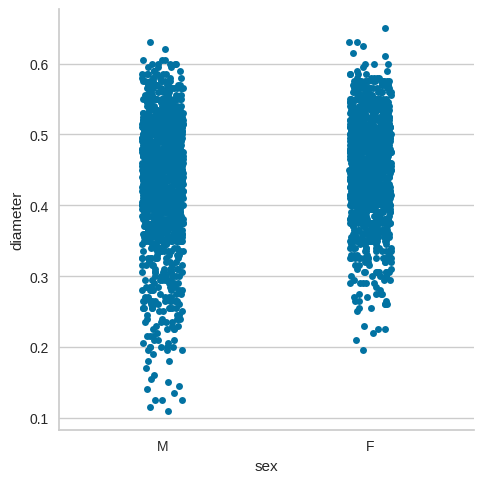

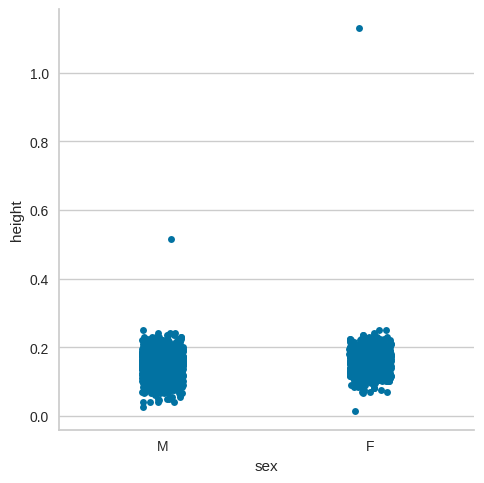

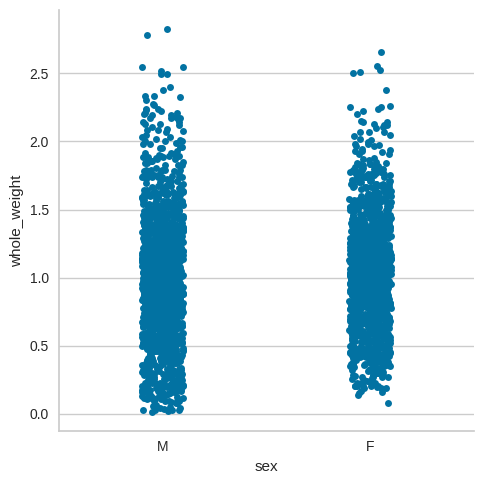

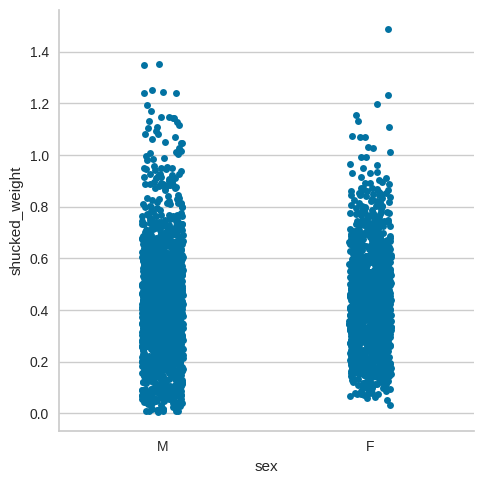

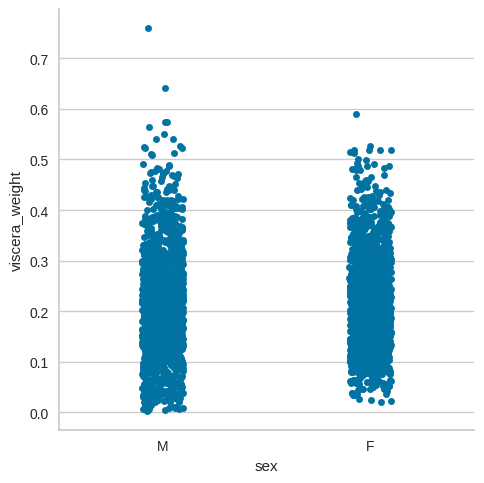

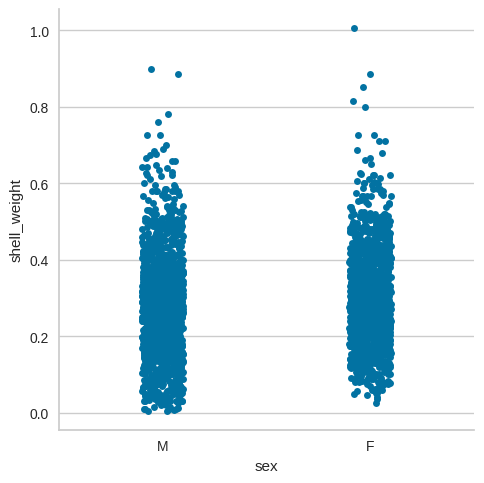

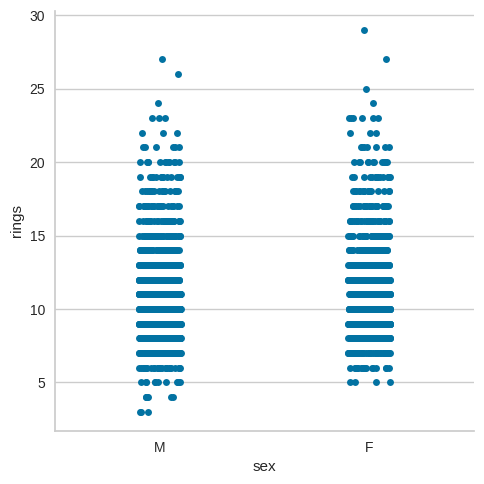

In [ ]:
sns.catplot(data=df_length, x = 'sex', y='length')
sns.catplot(data=df_diameter, x = 'sex', y='diameter')
sns.catplot(data=df_height, x = 'sex', y='height')
sns.catplot(data=df_whole_weight, x = 'sex', y='whole_weight')
sns.catplot(data=df_shucked_weight, x = 'sex', y='shucked_weight')
sns.catplot(data=df_visceraweight, x = 'sex', y='viscera_weight')
sns.catplot(data=df_shellweight, x = 'sex', y='shell_weight')
sns.catplot(data=df_rings, x = 'sex', y='rings')


The above plots show that there is no difference in features between the sexes of abalone shells. Therefore will be difficult to create an algorithm that will accurately classify. Two Oceans Aquarium and Marine Science states the sex of an abalone shell can be determined based on the colour of its reproductive organ [1, 2]. The organ is pale/beige in colour in males and a dark-grey or green in females [1, 2].

Fish Consulting group states that there is no sexual dimorphism of the shell structure and so determing the sex of an abalone cannot be done based on the external differentation and can only be determined through the visual inspection of gonads (the reproductive organ) [3].

[1] https://www.aquarium.co.za/news/everything-you-need-to-know-about-abalone#:~:text=Its%20largest%20organ%20is%20its,Image%20courtesy%20Marine%20Science.
[2]https://www.marinebio.net/marinescience/06future/abrepro.htm#:~:text=Abalone%20are%20separate%20sexed.&text=The%20abalone%20will%20usually%20get,male%20(beige%20reproductive%20organ).
[3] https://fishconsult.org/?p=10413

# Experiment 1: Male v Female

In [ ]:
s = setup(df_MF, target = 'sex', experiment_name = 'abalone_sex_classification')
best1 = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

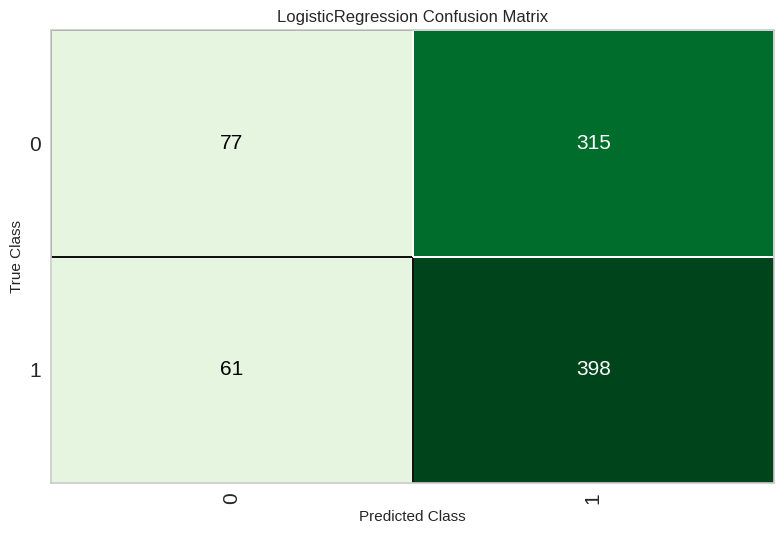

In [ ]:
plot_model(best1, plot='confusion_matrix')

This confusion matrix is showing that the model is mostly predicting class 1 which is the male class. Lets check if there is any class imbalance that could be causing these results.

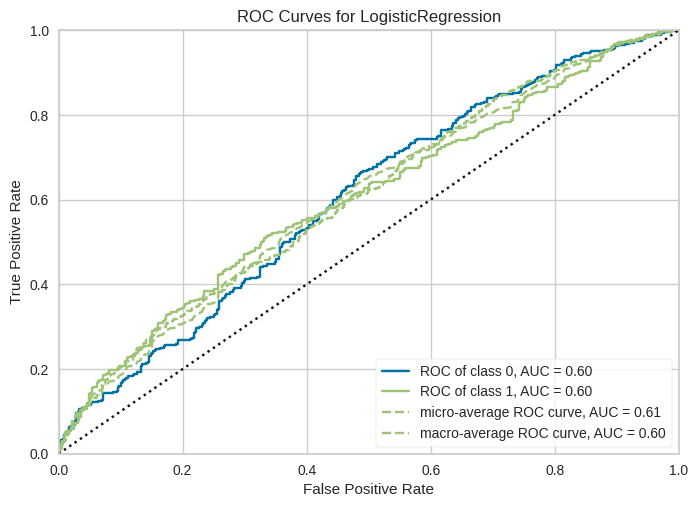

In [ ]:
plot_model(best1, plot='auc')

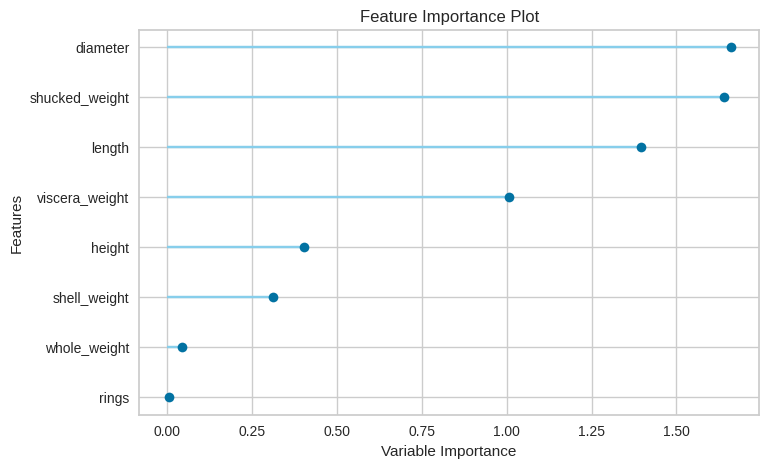

In [ ]:
plot_model(best1, plot='feature')

In [ ]:
holdout_pred = predict_model(best1)

Observing that the features 'rings' and 'whole_weight' have almost no variable importance in the model and 'rings' also showed the least amount of correlation among the other features. Lets remove those two features and see if any improvements are made.

#Experiment 2: Balancing Dataset (Male Vs Female)

In [ ]:
sex_count = df_MF['sex'].value_counts()

M    1527
F    1307
Name: sex, dtype: int64


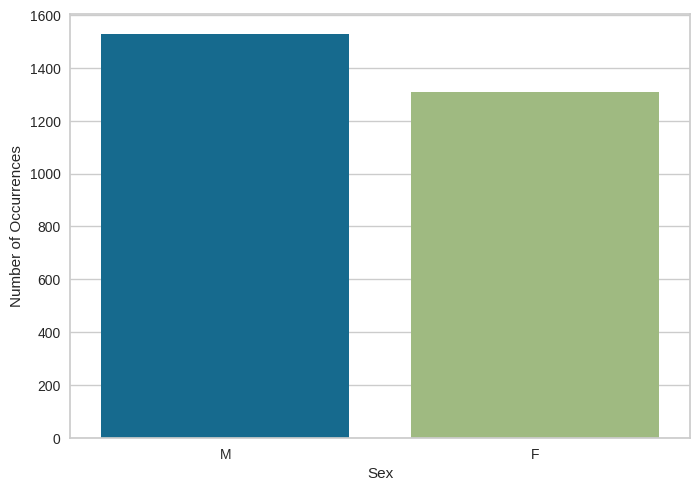

In [ ]:
plt.figure()
sns.barplot(x = sex_count.index, y = sex_count.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('Sex')
plt.show()

In [ ]:
male_count = sex_count.values[0]
fem_count = sex_count.values[1]

print('Male population:', male_count)
print('Female population:', fem_count)
print('Difference in populations:', male_count - fem_count)

Male population: 1527
Female population: 1307
Difference in populations: 220


There are 220 more instances of male classed data than female classed data. Although this isn't a huge difference it may play a partial role in the reason the model is over predicting the male class. Lets remove 220 random male class data samples and see if this makes any difference in the results.

In [ ]:
column_name = 'sex'
class_to_remove = 'M'
n_samples_to_remove = 220

indices_to_remove = df[df[column_name] == class_to_remove].sample(n=n_samples_to_remove, random_state=42).index

df_balanced = df_MF.drop(indices_to_remove)

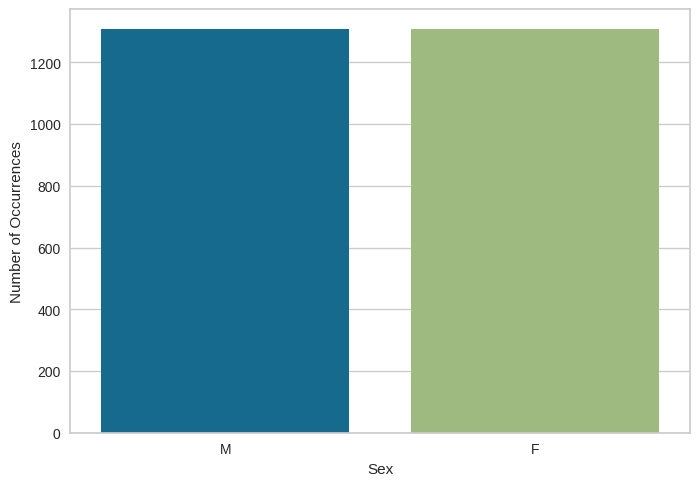

Male population: 1307
Female population: 1307


In [ ]:
#lets check if this worked and the classes are now balanced
sex_count = df_balanced['sex'].value_counts()

plt.figure()
sns.barplot(x = sex_count.index, y= sex_count.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('Sex')
plt.show()

male_count = sex_count.values[0]
fem_count = sex_count.values[1]

print('Male population:', male_count)
print('Female population:', fem_count)

Now that the classes are balanced, lets run the models again and see if it makes any difference..

In [ ]:
s = setup(df_balanced, target = 'sex', experiment_name = 'abalone_sex_classification')
best2 = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

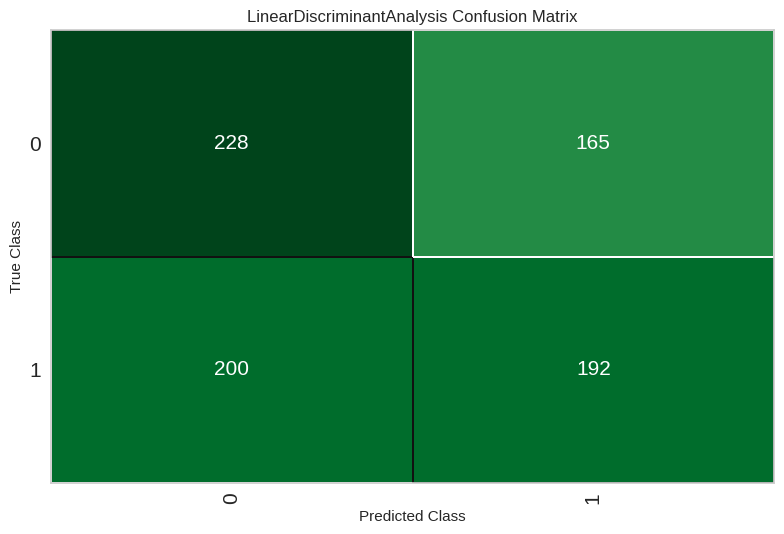

In [ ]:
plot_model(best2, plot='confusion_matrix')

Balancing the dataset did slightly improve the metrics. The accuracy, AUC, and F1 all slightly increased by about 0.01 or 0.02.

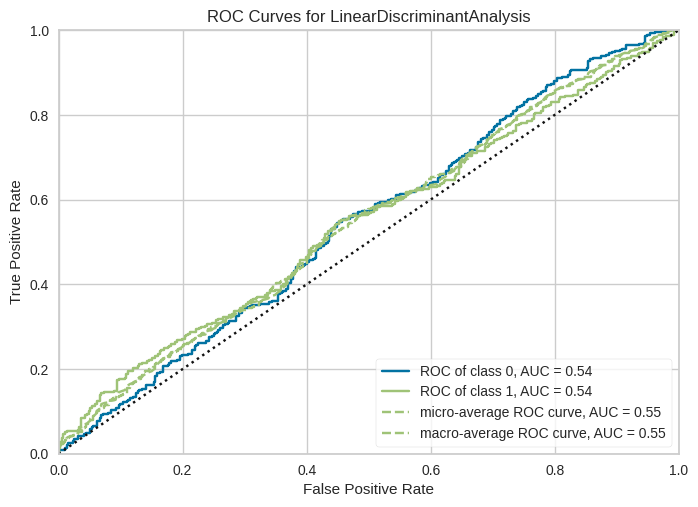

In [ ]:
plot_model(best2, plot='auc')

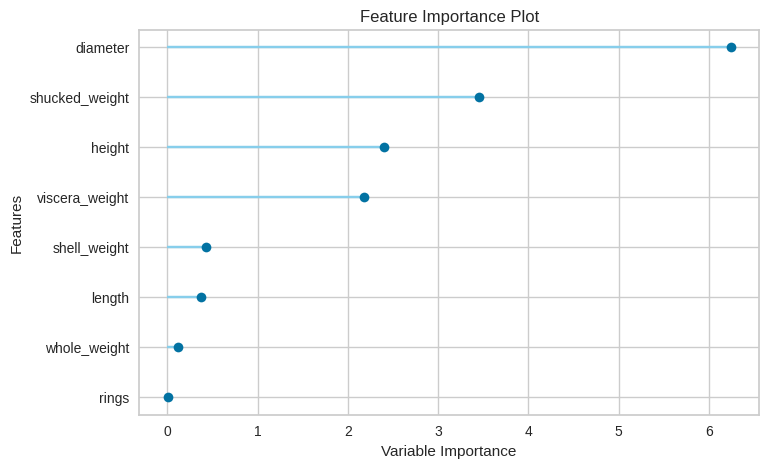

In [ ]:
plot_model(best2, plot='feature')

In [ ]:
holdout_pred = predict_model(best2)

In [ ]:
tuned_dt2 = tune_model(best2)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
holdout_pred = predict_model(tuned_dt2)

# Experiment 3: Removing Features Rings and Whole Weight

As mentioned in Experiment 1, the features 'rings' and 'whole_weight' had barely any variable importance in the model decision. Lets see if the model results change at all if we remove these features.

In [ ]:
df_new = df_MF.drop('rings', axis = 1)
df_new = df_new.drop('whole_weight', axis = 1)
print(df_new)

     sex  length  diameter  height  shucked_weight  viscera_weight  \
0      M   0.350     0.265   0.090          0.0995          0.0485   
1      F   0.530     0.420   0.135          0.2565          0.1415   
2      M   0.440     0.365   0.125          0.2155          0.1140   
5      F   0.530     0.415   0.150          0.2370          0.1415   
6      F   0.545     0.425   0.125          0.2940          0.1495   
...   ..     ...       ...     ...             ...             ...   
4171   F   0.565     0.450   0.165          0.3700          0.2390   
4172   M   0.590     0.440   0.135          0.4390          0.2145   
4173   M   0.600     0.475   0.205          0.5255          0.2875   
4174   F   0.625     0.485   0.150          0.5310          0.2610   
4175   M   0.710     0.555   0.195          0.9455          0.3765   

      shell_weight  
0           0.0700  
1           0.2100  
2           0.1550  
5           0.3300  
6           0.2600  
...            ...  
4171        

In [ ]:
s = setup(df_new, target = 'sex', experiment_name = 'abalone_sex_classification')
best3 = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

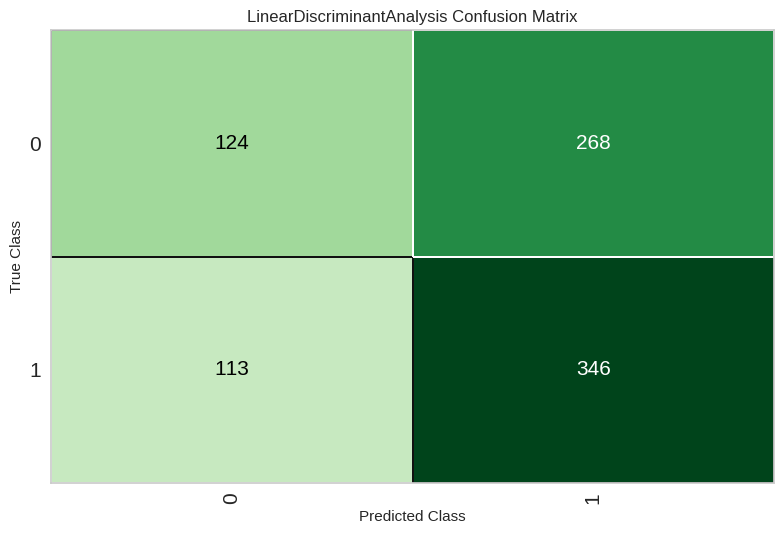

In [ ]:
plot_model(best3, plot='confusion_matrix')

In [ ]:
tuned_dt = tune_model(best3)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
holdout_pred = predict_model(tuned_dt)

The metrics barely changed from experiment 1. Showing that the features rings and whole weight were not playing a large role in the model decision.

# Experiment 4: Removing Feature Diameter



The feature 'diameter' was shown to have the most importance for the model. Lets test how much the metrics would change if we remove this feature.

In [ ]:
df_no_diam = df_MF.drop('diameter', axis = 1)
print(df_no_diam)

     sex  length  height  whole_weight  shucked_weight  viscera_weight  \
0      M   0.350   0.090        0.2255          0.0995          0.0485   
1      F   0.530   0.135        0.6770          0.2565          0.1415   
2      M   0.440   0.125        0.5160          0.2155          0.1140   
5      F   0.530   0.150        0.7775          0.2370          0.1415   
6      F   0.545   0.125        0.7680          0.2940          0.1495   
...   ..     ...     ...           ...             ...             ...   
4171   F   0.565   0.165        0.8870          0.3700          0.2390   
4172   M   0.590   0.135        0.9660          0.4390          0.2145   
4173   M   0.600   0.205        1.1760          0.5255          0.2875   
4174   F   0.625   0.150        1.0945          0.5310          0.2610   
4175   M   0.710   0.195        1.9485          0.9455          0.3765   

      shell_weight  rings  
0           0.0700      7  
1           0.2100      9  
2           0.1550     10  

In [ ]:
s = setup(df_no_diam, target = 'sex', experiment_name = 'abalone_sex_classification')
best4 = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

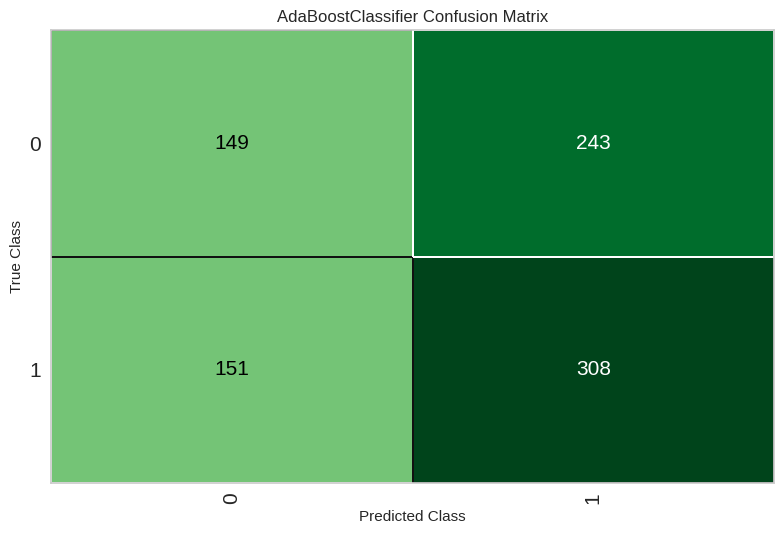

In [ ]:
plot_model(best4, plot='confusion_matrix')

The metrics barely changed removing the feature 'diameter'. An accuracy around 50% is showing that the model is basically randomly predicting. The kappa value is also extremely low showing that the model is just random.

Since proper results cannot be obtained with this data to classify between male and female, I have decided to demonstrate some classification between adult and infant classes. The 'sex' category for this dataset provided 3 classes, male, female, and infant. Combining male and female into one class called adult and predicting if the abalone is an adult or infant is still a classification problem.


# Experiment 5: Classification between Adult (male and female) vs Immature Abalone

First, the classes male and female need to be converted to one class, an adult class. To do this, all values in the first column 'sex' are changed to 'A' if these values are 'M' or 'F'. The values that are 'I' are left, this is the infant class.

In [20]:
old_value = 'M'
old_value_2 = 'F'
new_value = 'A'

rows_to_change = df['sex'] == old_value

df.loc[rows_to_change, 'sex'] = new_value

rows_to_change = df['sex'] == old_value_2
df.loc[rows_to_change, 'sex'] = new_value

print(df)

     sex  length  diameter  height  whole_weight  shucked_weight  \
0      A   0.350     0.265   0.090        0.2255          0.0995   
1      A   0.530     0.420   0.135        0.6770          0.2565   
2      A   0.440     0.365   0.125        0.5160          0.2155   
3      I   0.330     0.255   0.080        0.2050          0.0895   
4      I   0.425     0.300   0.095        0.3515          0.1410   
...   ..     ...       ...     ...           ...             ...   
4171   A   0.565     0.450   0.165        0.8870          0.3700   
4172   A   0.590     0.440   0.135        0.9660          0.4390   
4173   A   0.600     0.475   0.205        1.1760          0.5255   
4174   A   0.625     0.485   0.150        1.0945          0.5310   
4175   A   0.710     0.555   0.195        1.9485          0.9455   

      viscera_weight  shell_weight  rings  
0             0.0485        0.0700      7  
1             0.1415        0.2100      9  
2             0.1140        0.1550     10  
3      

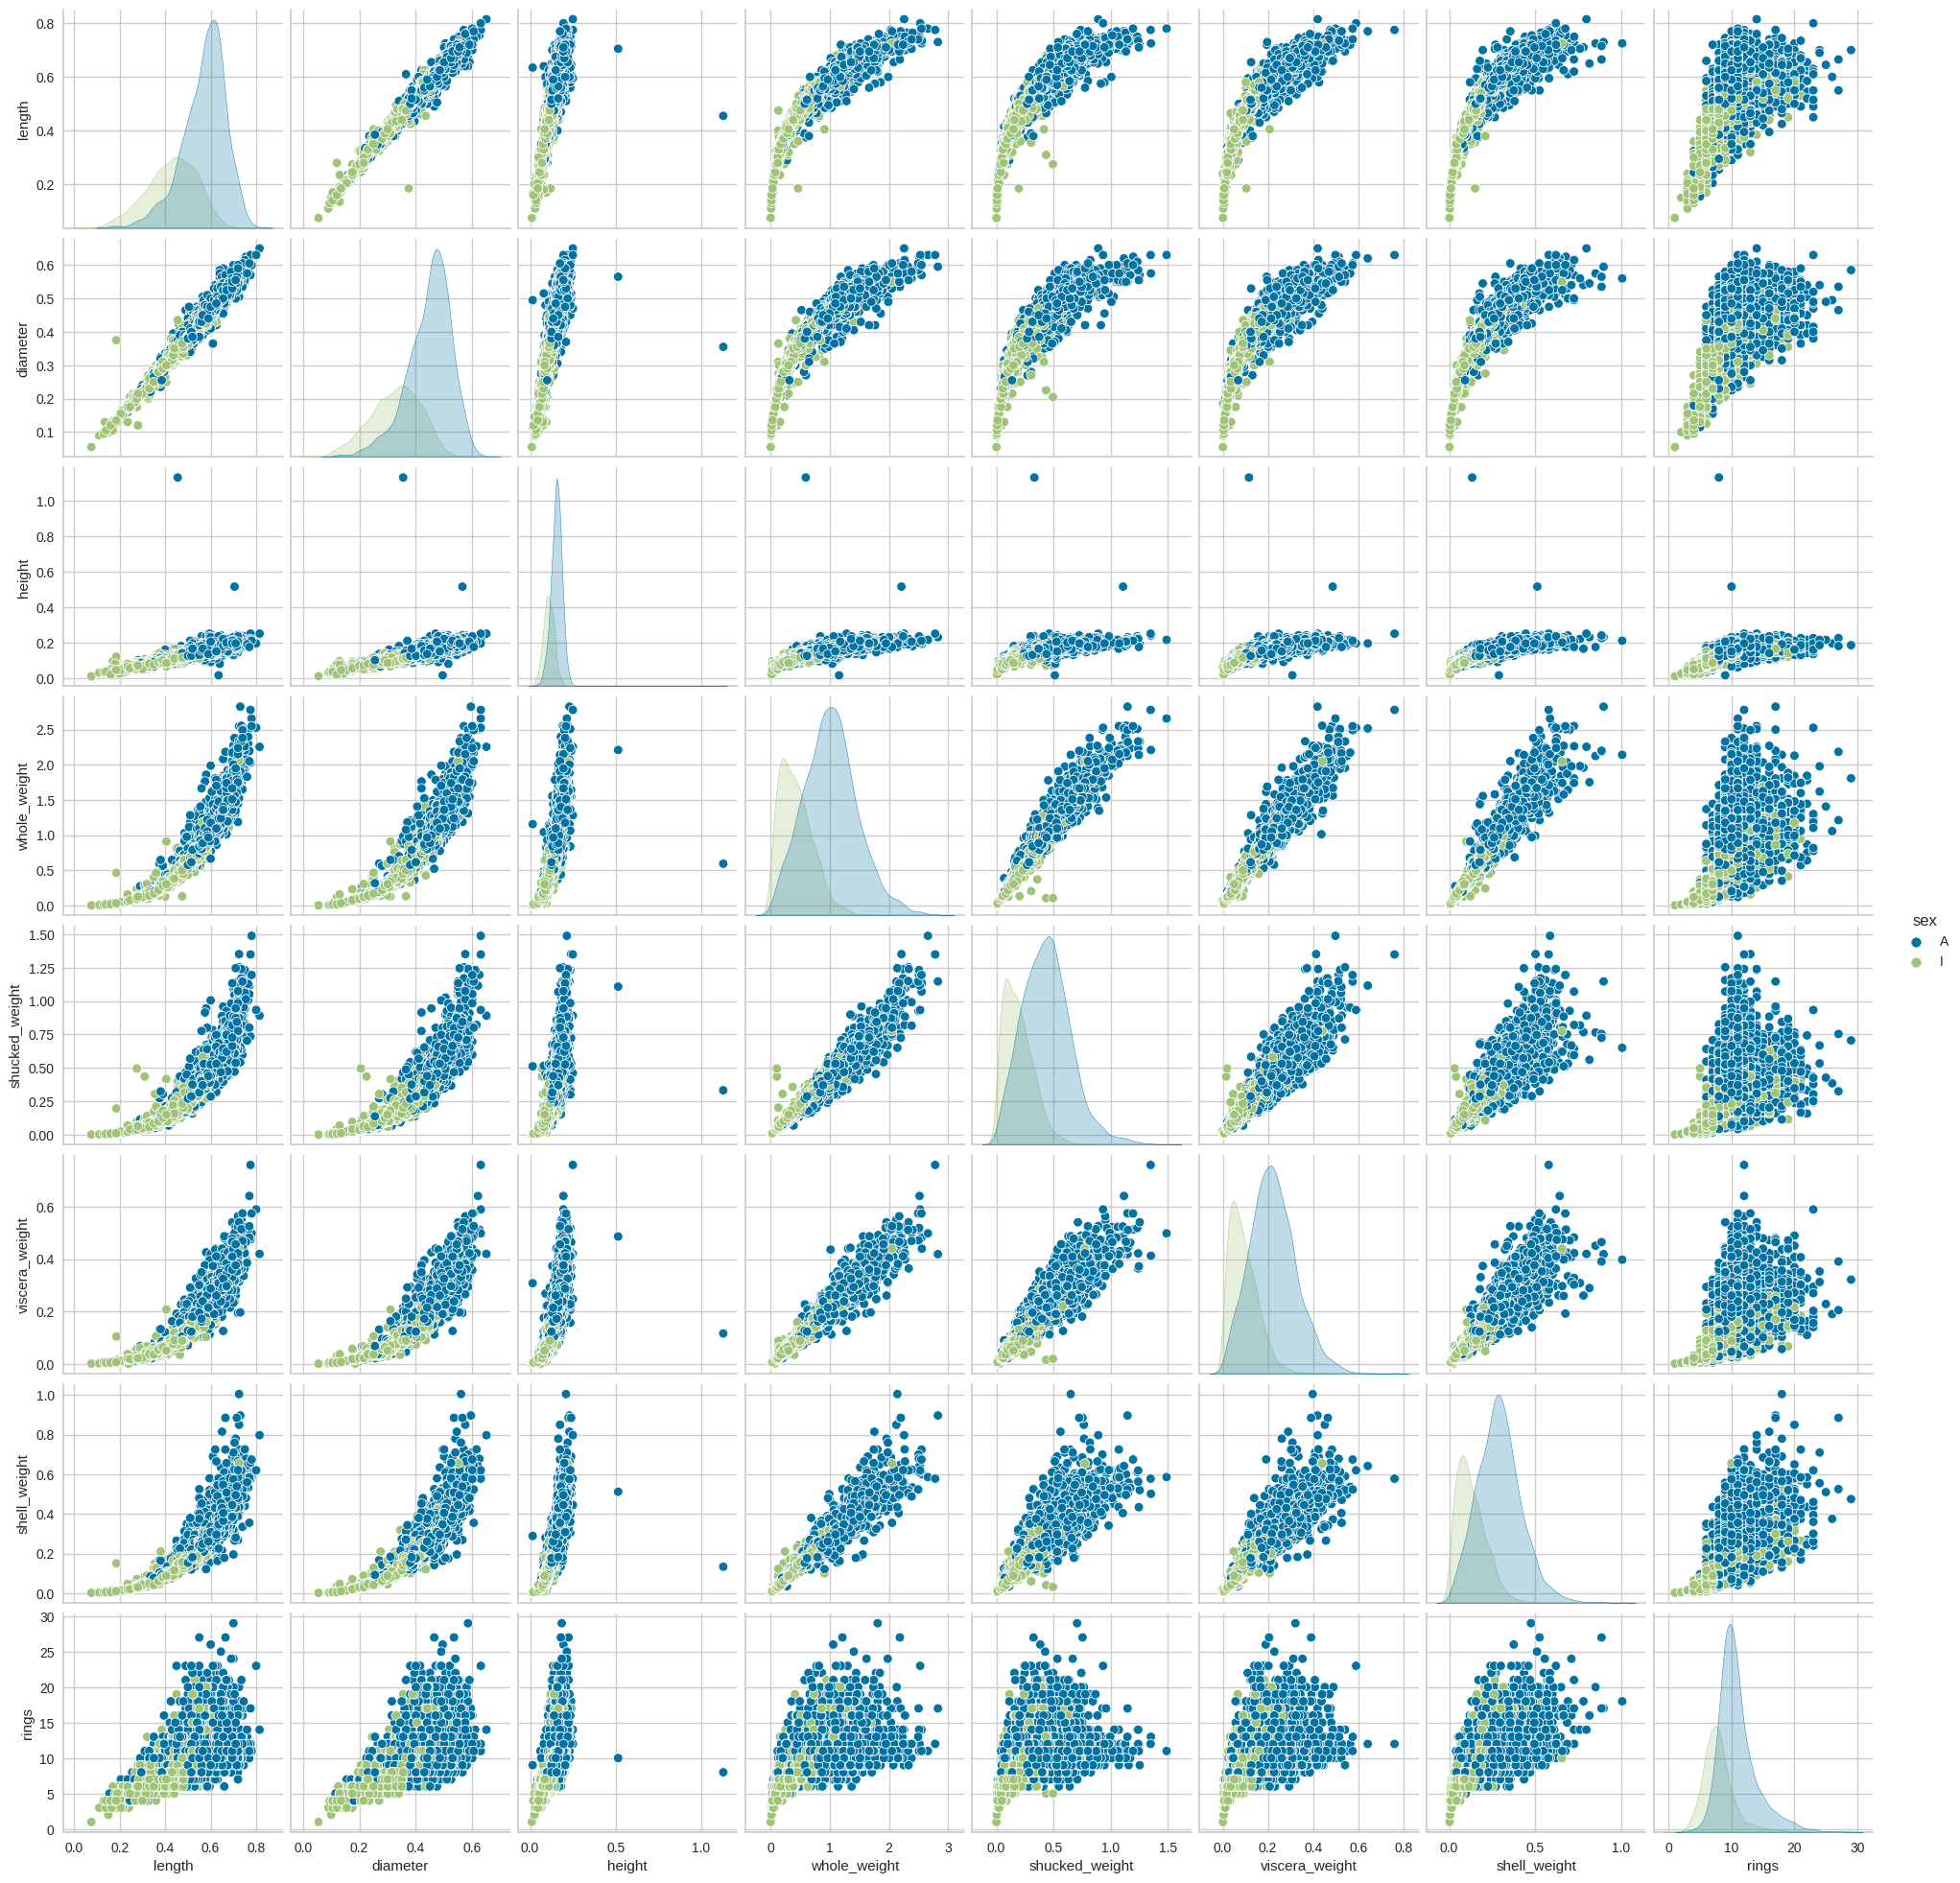

In [ ]:
sns.pairplot(df, hue = 'sex')

Looking at the above pair plot, we can see that there is distinct coloured clusters representing adult and infant groups. These plots are showing it will be easier to distinguish between adult and infant abalone compared to male and female abalone.

In [ ]:
df_length=df[['sex', 'length']]
df_diameter=df[['sex', 'diameter']]
df_height=df[['sex', 'height']]
df_whole_weight=df[['sex', 'whole_weight']]
df_shucked_weight=df[['sex', 'shucked_weight']]
df_visceraweight=df[['sex', 'viscera_weight']]
df_shellweight=df[['sex', 'shell_weight']]
df_rings=df[['sex', 'rings']]

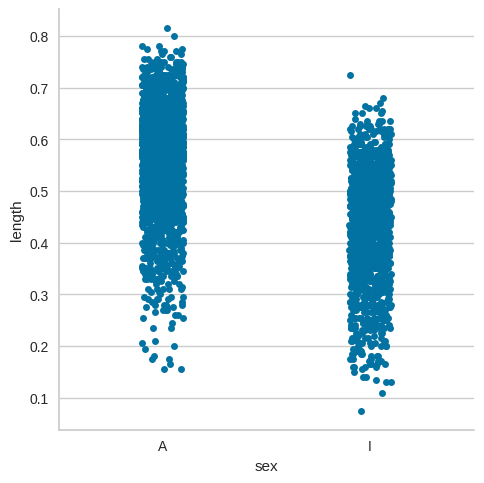

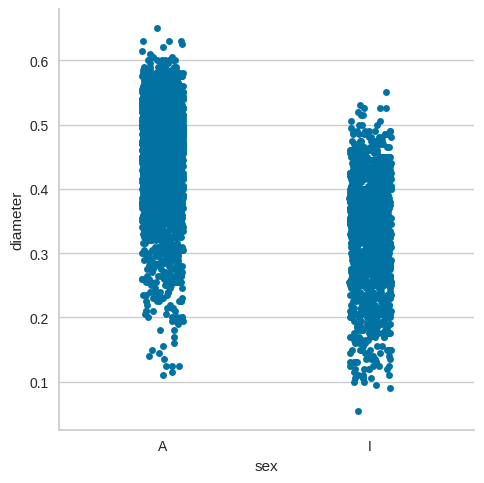

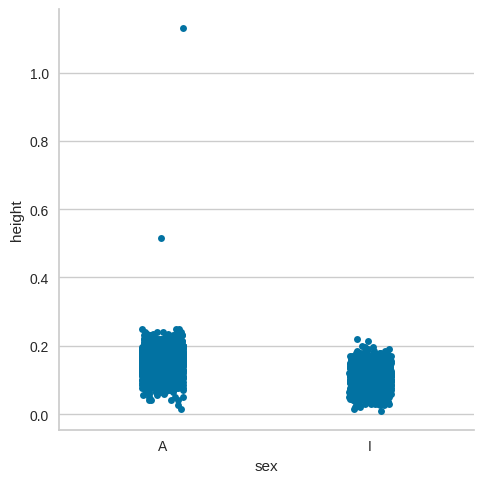

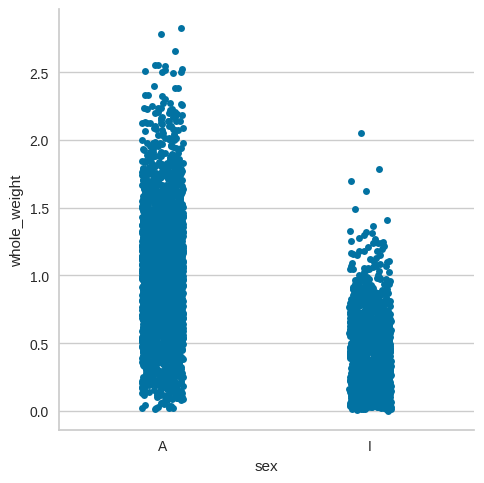

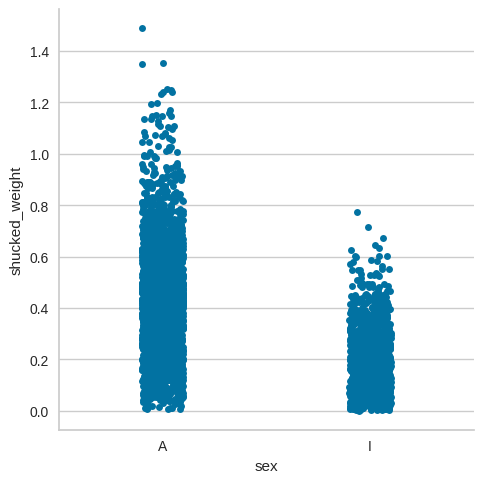

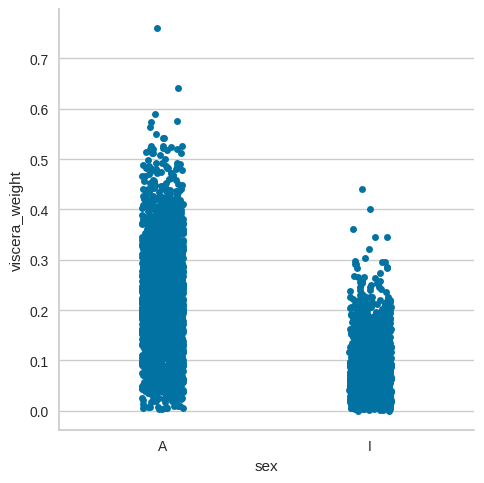

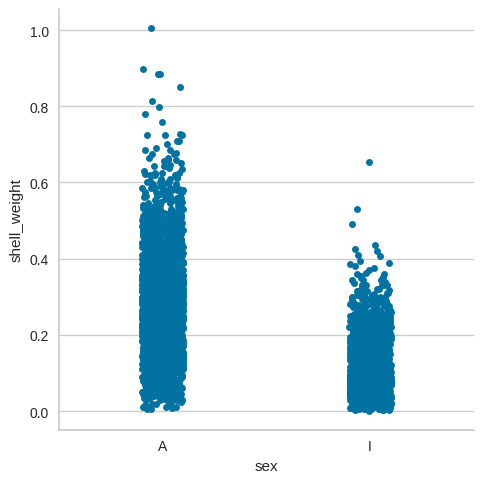

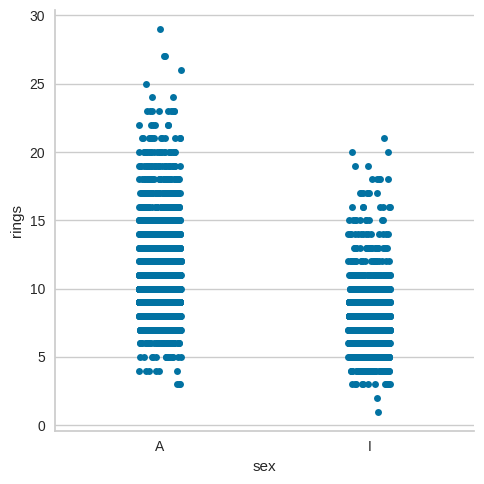

In [ ]:
sns.catplot(data=df_length, x = 'sex', y='length')
sns.catplot(data=df_diameter, x = 'sex', y='diameter')
sns.catplot(data=df_height, x = 'sex', y='height')
sns.catplot(data=df_whole_weight, x = 'sex', y='whole_weight')
sns.catplot(data=df_shucked_weight, x = 'sex', y='shucked_weight')
sns.catplot(data=df_visceraweight, x = 'sex', y='viscera_weight')
sns.catplot(data=df_shellweight, x = 'sex', y='shell_weight')
sns.catplot(data=df_rings, x = 'sex', y='rings')

In [ ]:
s = setup(df, target = 'sex', experiment_name = 'abalone_age_classification')
best_AI = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

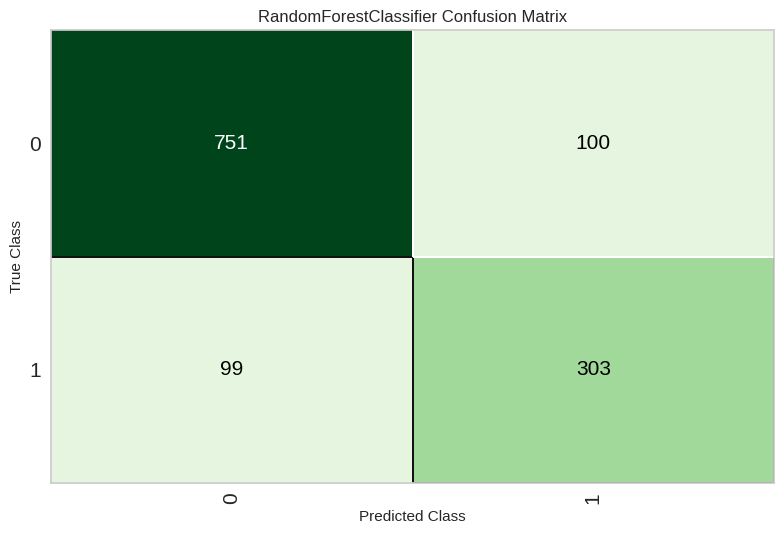

In [ ]:
plot_model(best_AI, plot='confusion_matrix')

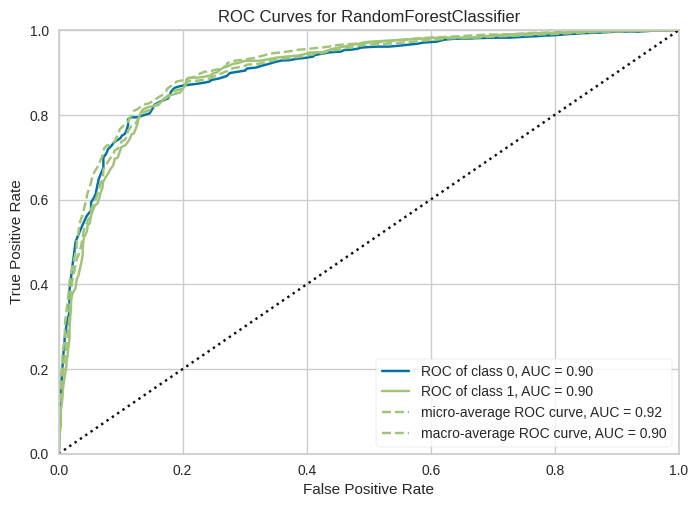

In [ ]:
plot_model(best_AI, plot='auc')

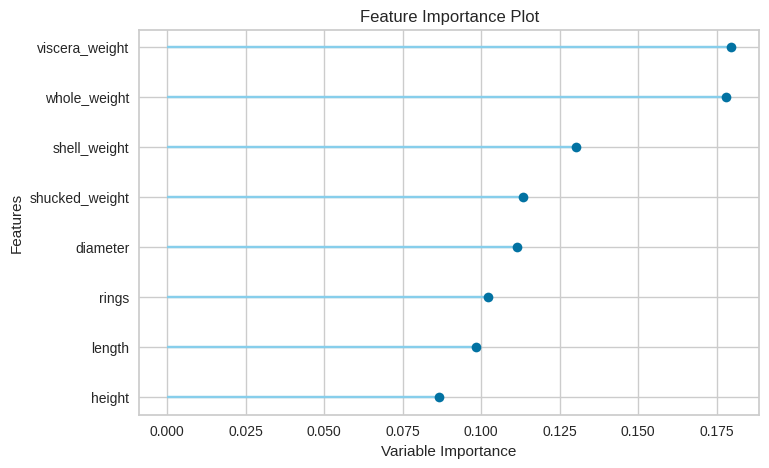

In [ ]:
plot_model(best_AI, plot='feature')

In [ ]:
tuned_dt = tune_model(best_AI)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
holdout_pred = predict_model(best_AI)

# Experiment 6: Removing Length Feature for Adult v Infant Classification


In [ ]:
df_no_len = df.drop('length', axis = 1)
print(df_no_len)

     sex  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0      A     0.265   0.090        0.2255          0.0995          0.0485   
1      A     0.420   0.135        0.6770          0.2565          0.1415   
2      A     0.365   0.125        0.5160          0.2155          0.1140   
3      I     0.255   0.080        0.2050          0.0895          0.0395   
4      I     0.300   0.095        0.3515          0.1410          0.0775   
...   ..       ...     ...           ...             ...             ...   
4171   A     0.450   0.165        0.8870          0.3700          0.2390   
4172   A     0.440   0.135        0.9660          0.4390          0.2145   
4173   A     0.475   0.205        1.1760          0.5255          0.2875   
4174   A     0.485   0.150        1.0945          0.5310          0.2610   
4175   A     0.555   0.195        1.9485          0.9455          0.3765   

      shell_weight  rings  
0           0.0700      7  
1           0.2100      9  
2  

In [ ]:
s = setup(df_no_len, target = 'sex', experiment_name = 'abalone_age_classification')
best6 = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

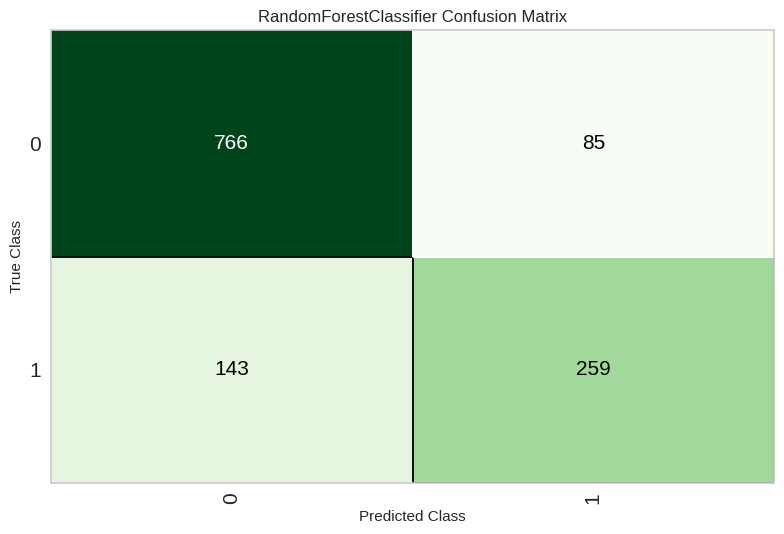

In [ ]:
plot_model(best6, plot='confusion_matrix')

In [ ]:
holdout_pred = predict_model(best6)

# Experiment 7: Removing Weight Features for Adult v Infant Classification

In [ ]:
df_no_weight = df.drop('viscera_weight', axis = 1)
df_no_weight = df_no_weight.drop('shell_weight', axis = 1)
df_no_weight = df_no_weight.drop('whole_weight', axis = 1)
df_no_weight = df_no_weight.drop('shucked_weight', axis = 1)


print(df_no_weight)

     sex  length  diameter  height  rings
0      A   0.350     0.265   0.090      7
1      A   0.530     0.420   0.135      9
2      A   0.440     0.365   0.125     10
3      I   0.330     0.255   0.080      7
4      I   0.425     0.300   0.095      8
...   ..     ...       ...     ...    ...
4171   A   0.565     0.450   0.165     11
4172   A   0.590     0.440   0.135     10
4173   A   0.600     0.475   0.205      9
4174   A   0.625     0.485   0.150     10
4175   A   0.710     0.555   0.195     12

[4174 rows x 5 columns]


In [ ]:
s = setup(df_no_weight, target = 'sex', experiment_name = 'abalone_age_classification')
best7 = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
holdout_pred = predict_model(best7)

# Experiment 8: Only Using The Feature Length

In [ ]:
df_no = df.drop('viscera_weight', axis = 1)
df_no = df_no.drop('shell_weight', axis = 1)
df_no = df_no.drop('whole_weight', axis = 1)
df_no = df_no.drop('shucked_weight', axis = 1)
df_no = df_no.drop('height', axis = 1)
df_no = df_no.drop('diameter', axis = 1)
df_no = df_no.drop('rings', axis = 1)

print(df_no)

     sex  length
0      A   0.350
1      A   0.530
2      A   0.440
3      I   0.330
4      I   0.425
...   ..     ...
4171   A   0.565
4172   A   0.590
4173   A   0.600
4174   A   0.625
4175   A   0.710

[4174 rows x 2 columns]


In [ ]:
s = setup(df_no, target = 'sex', experiment_name = 'abalone_age_classification')
best8 = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Experiment 9: Balancing the Dataset

In [21]:
age_count = df['sex'].value_counts()

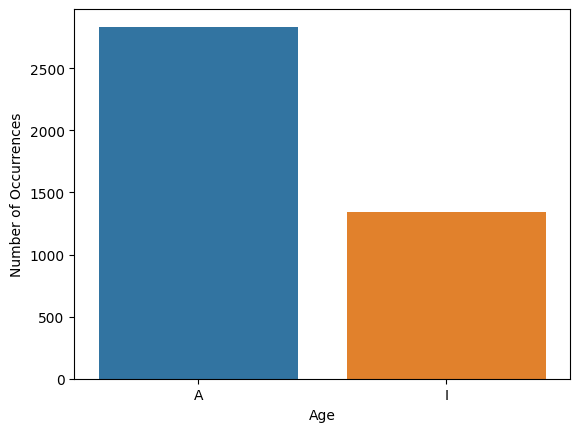

In [22]:
plt.figure()
sns.barplot(x = age_count.index, y = age_count.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('Age')
plt.show()

In [23]:
adult_count = age_count.values[0]
im_count = age_count.values[1]

print('Adult population:', adult_count)
print('Infant population:', im_count)
print('Difference in populations:', adult_count - im_count)

Adult population: 2834
Infant population: 1340
Difference in populations: 1494


In [24]:
column_name = 'sex'
class_to_remove = 'A'
n_samples_to_remove = 1494

indices_to_remove = df[df[column_name] == class_to_remove].sample(n=n_samples_to_remove, random_state=42).index

df_balanced_AI = df.drop(indices_to_remove)

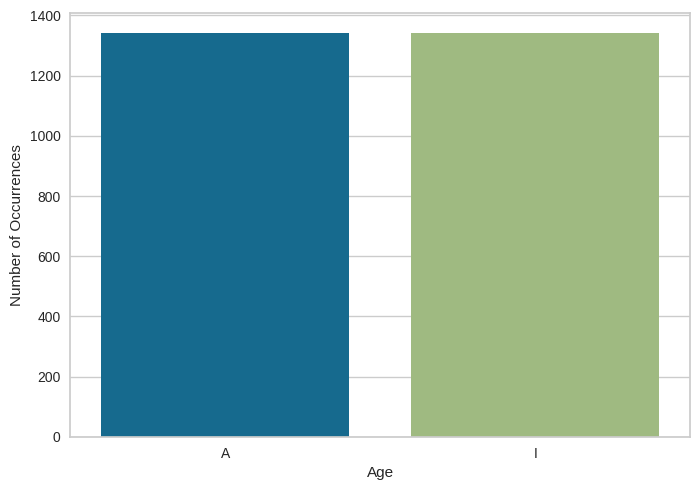

Adult population: 2834
Immature population: 1340


In [ ]:
#lets check if this worked and the classes are now balanced
age_count = df_balanced_AI['sex'].value_counts()

plt.figure()
sns.barplot(x = age_count.index, y= age_count.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('Age')
plt.show()

adult_count = sex_count.values[0]
im_count = sex_count.values[1]

print('Adult population:', adult_count)
print('Infant population:', im_count)

In [ ]:
s = setup(df_balanced_AI, target = 'sex', experiment_name = 'abalone_age_classification')
best9 = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

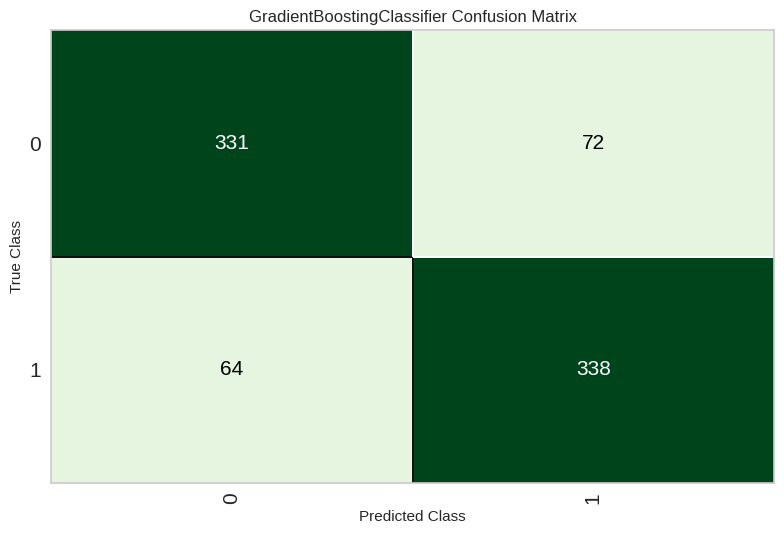

In [ ]:
plot_model(best9, plot='confusion_matrix')

In [ ]:
holdout_pred = predict_model(best9)